In [1]:
import pandas as pd 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [113]:
data = pd.read_csv('690a-vazao-vila-aurea-20-04-2016.csv')
#data = pd.read_csv('690g-pressao_entrada-vila-aurea-20-04-2016.csv')

data_matrix = data.as_matrix()

data_matrix = data_matrix[340519:,2:]        # Elimina os termos nan da matriz

#data_matrix = np.nan_to_num(data_matrix)    # Tentei usar este comando para eliminar o 
                                             # termo nan, porém não funcionou                              
minutos = data_matrix.shape[0]

print "Total de minutos:", minutos

#print data_matrix

Total de minutos: 186238


In [131]:
# smoothing an array that represents the time serie.
def hanning(x, window_len):
    #x_=np.r_[2*x[0]-x[window_len:1:-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    # Extend input data to avoid border issues.
    x_ = np.r_[[x[0]]*(window_len-1), x, [x[-1]]*(window_len-1)]
    # Hanning window (filter).
    f = np.hanning(window_len)
    # Apply convolution.
    y = np.convolve(x_, f/f.sum(), s, mode='same')
    # Return data to original size.
    return y[window_len-1:-window_len+1]

In [143]:
# Convolution using filter (1/4, 1/2, 1/4), (1/8, 1/4, 1/4, 1/4, 1/8), ...
# Depending on the length of the window.
def weighted_moving_average(x, window_len):
    # Extend input data to avoid border issues.
    x_ = np.r_[[x[0]]*(window_len-1), x, [x[-1]]*(window_len-1)]
    # Filter
    f=np.asarray([1./(2*(window_len-1))] + [1./(window_len-1)]*(window_len-2) + [1./(2*(window_len-1))])
    x_ = np.convolve(x_, f, mode='same')
    return x_[window_len-1:-window_len+1]

In [5]:
def media_janela (data_matrix, minutos, janela): 
    
    media = []
    for i in range (janela):
        media.append(np.mean(data_matrix[0:i + 1]))
        
    i += 1
           
    for i in range (i , minutos):
        media.append(np.mean(data_matrix[i - janela:i]))
         
    return media

In [134]:
def plot_grafico2(data_matrix, qtde_minutos, janela): 

    data_convolution = np.array(data_matrix).ravel()
    
    minutos = data_convolution.size
    
    data_hann = smooth(data_convolution, janela, window='hanning')
    data_wma = weighted_moving_average(data_convolution, janela)
    data_mj = media_janela(data_matrix, minutos, janela)
    
    indice = minutos - qtde_minutos

    x = np.arange(qtde_minutos)
    y0 = data_convolution[indice:]
    y1 = data_hann[indice:]
    y2 = data_wma[indice:]
    y3 = data_mj[indice:]
    
    #print 'Plot shapes', x.shape, y0.shape, y1.shape

    plt.plot(x, y0, label = u'Original', color = 'grey')
    plt.plot(x, y1, label = u'Convolução (Hann)', color = 'red')
    plt.plot(x, y2, label = u'WMA', color = 'blue')
    #plt.plot(x, y3, label = u'Média anterior', color = 'green')
    
    plt.legend(loc = 'upper right', fontsize = 'xx-large')

    plt.title(u' Comparação dos métodos de suavização da vazão com janela %i'%(janela), fontsize = 20)
    plt.xlabel('%i minutos mais recentes'%(qtde_minutos), fontsize = 20)
    plt.ylabel(u'Vazão',  fontsize = 20)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)

    plt.show() 

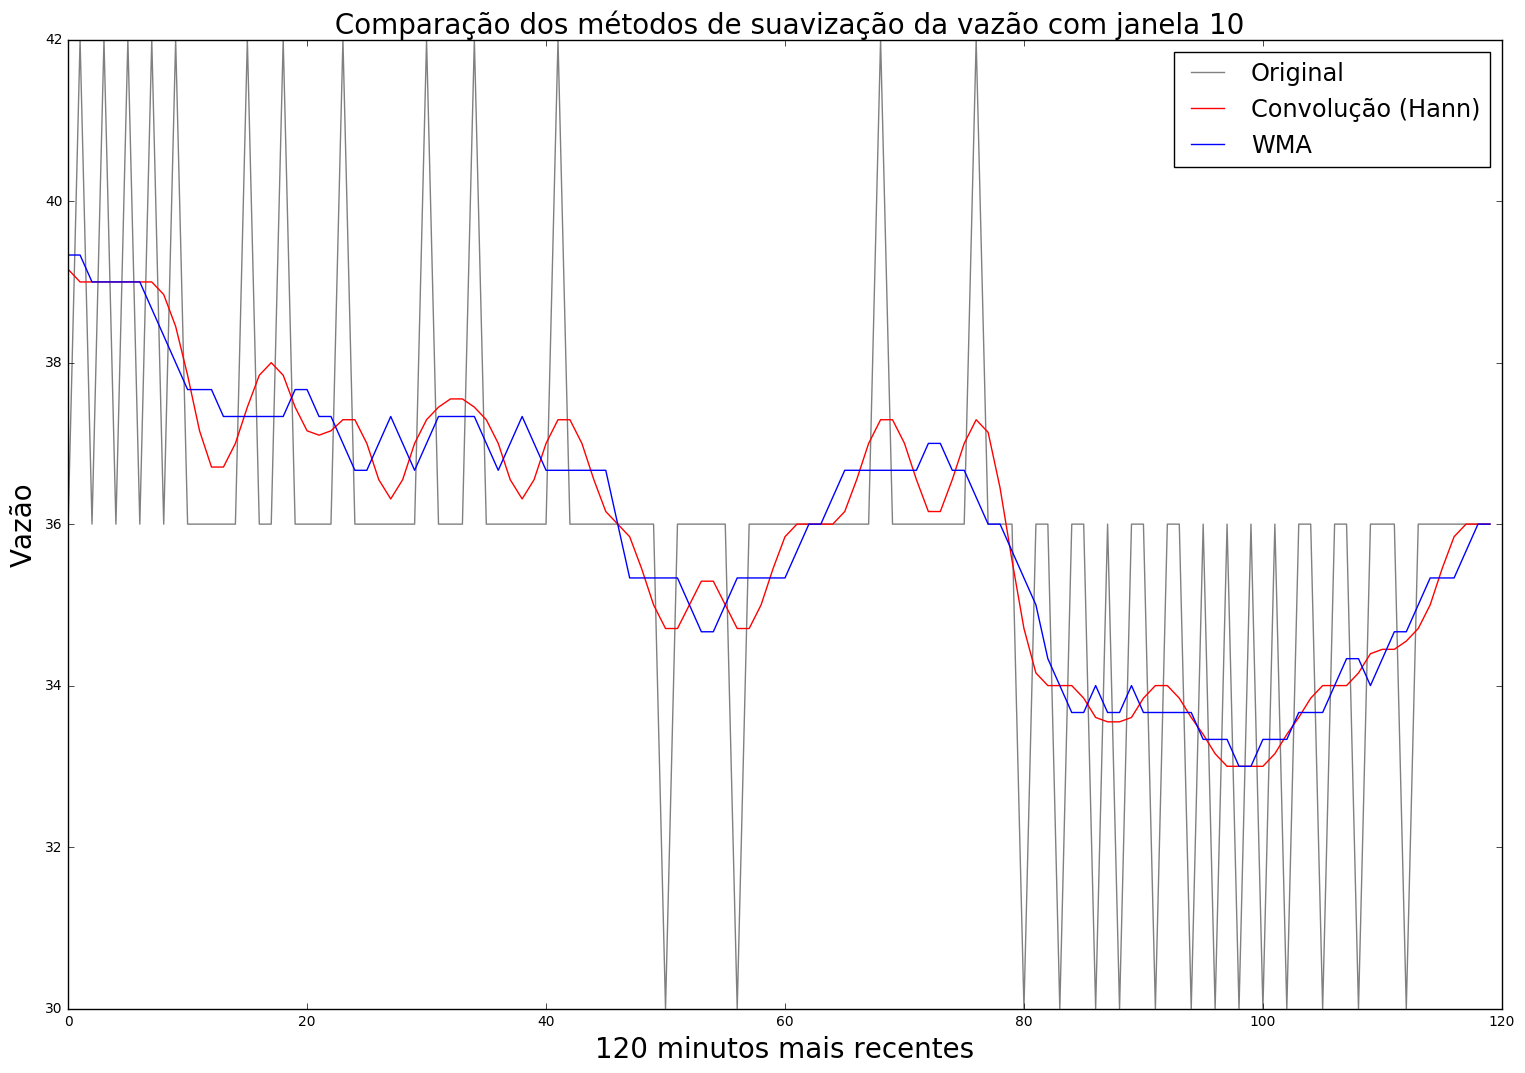

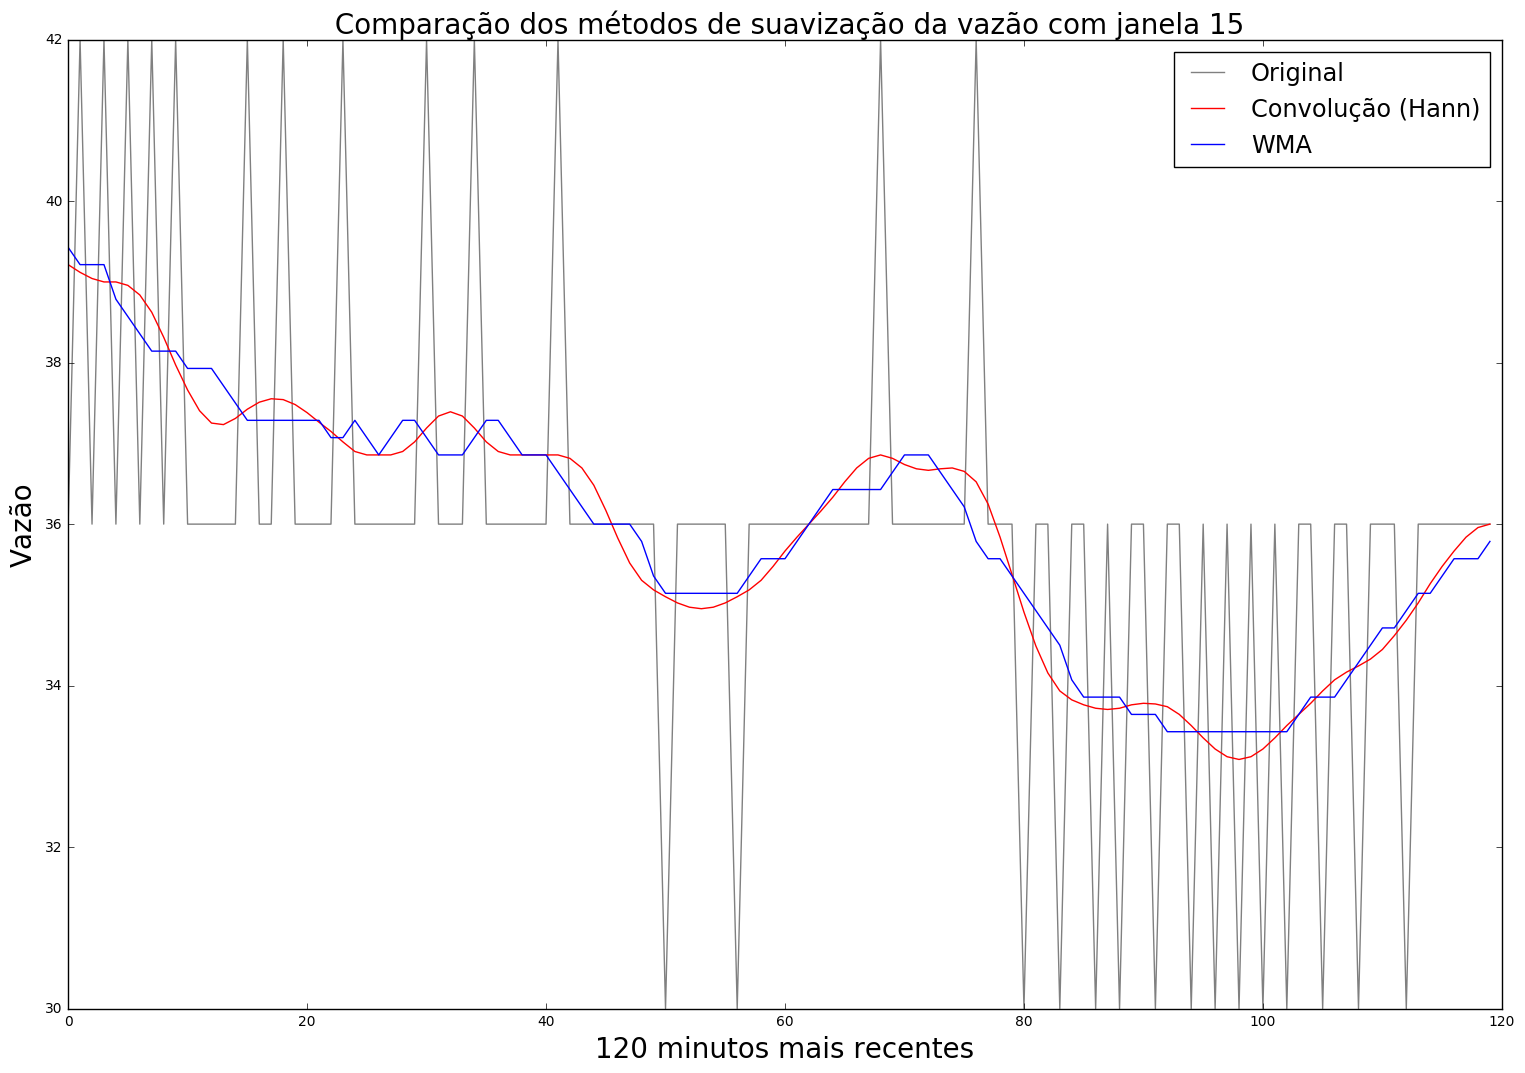

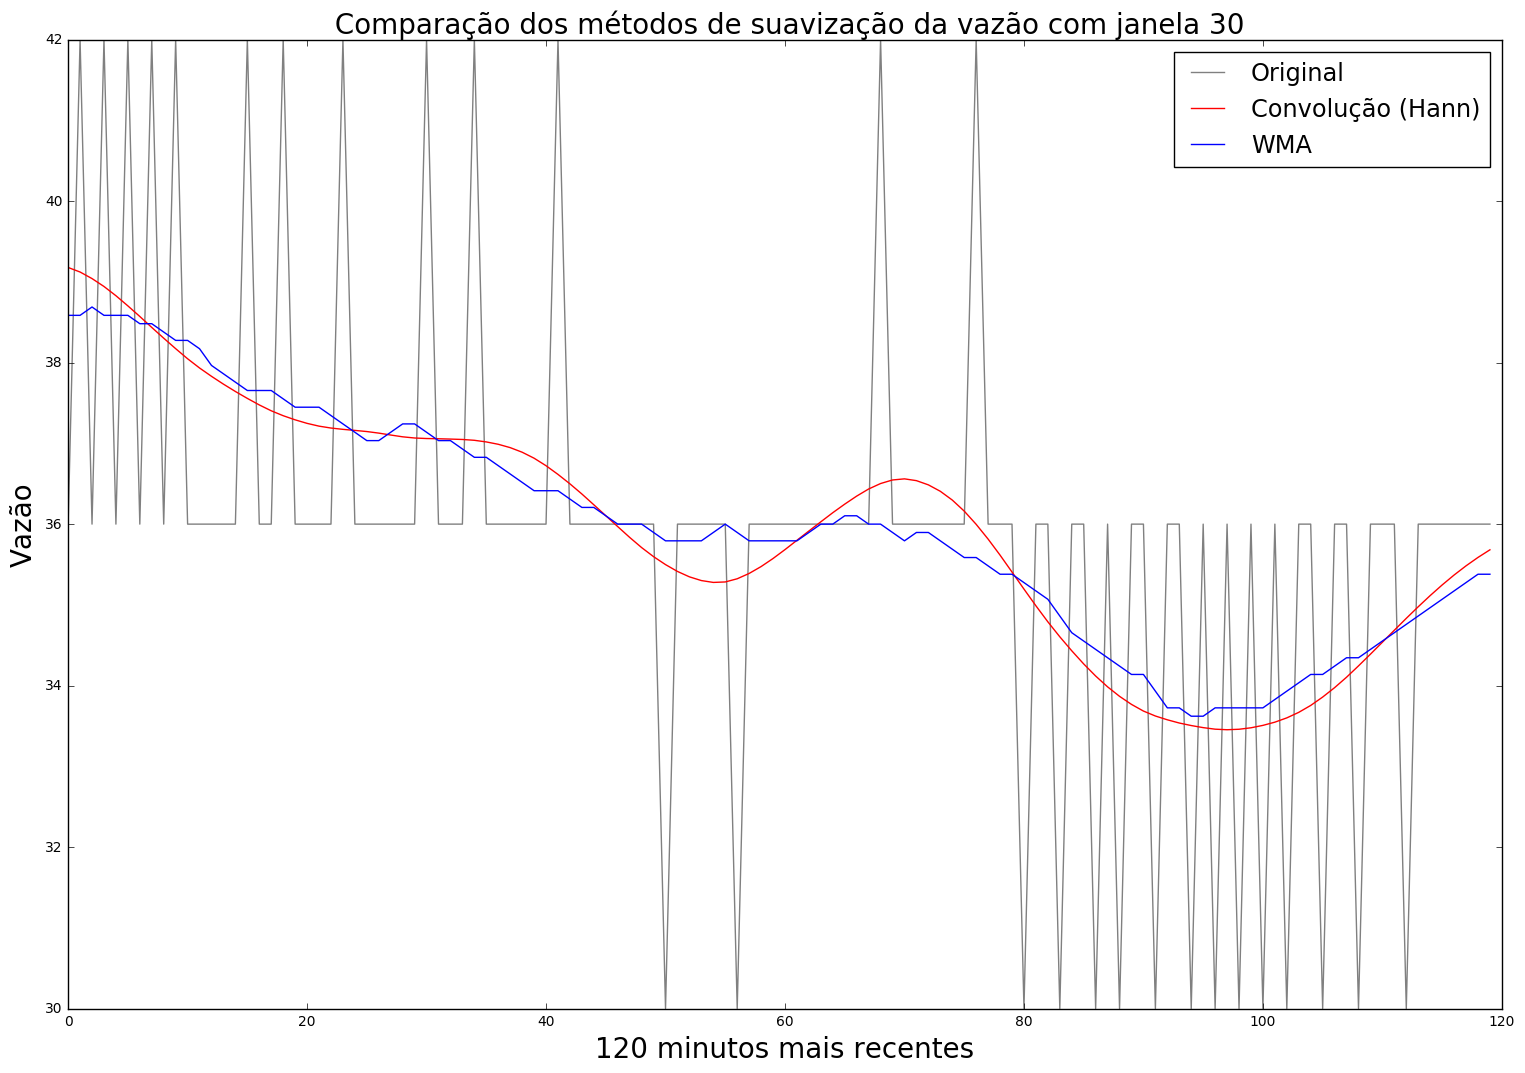

In [144]:
qtde_minutos = 60*2

#plot_grafico2(data_matrix, qtde_minutos, 1)
#plot_grafico2(data_matrix, qtde_minutos, 2)
#plot_grafico2(data_matrix, qtde_minutos, 5)
plot_grafico2(data_matrix, qtde_minutos, 10)
plot_grafico2(data_matrix, qtde_minutos, 15)
plot_grafico2(data_matrix, qtde_minutos, 30)